In [1]:
import json
import random
import numpy as np
import gzip
import pickle
from attractors import similarity
from matplotlib import pyplot as plt
from write_yed_template import create_gml
from sklearn.cluster import DBSCAN
from umap import UMAP
from statistics import mean, median
from util import action_set

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
def action_sets(models):
    all_actions = []

    for model in models:
        actions = action_set(model)
        all_actions.append(actions)
    return all_actions

In [4]:
def unique_features(all_actions):
    unique_actions = set()
    for actions in all_actions:
        unique_actions = unique_actions | actions

    action_idxs = dict()
    for i, action in enumerate(unique_actions):
        action_idxs[tuple(action)] = i
    return action_idxs

In [5]:
def model_feature_vectors(models, features, all_actions):
    vectors = np.zeros((len(models),len(features)), dtype=bool)

    for i,actions in enumerate(all_actions):
        for j,action in enumerate(actions):
            idx = features[tuple(action)]
            vectors[i,idx] = 1
            
    return vectors

In [6]:
node_ordering = ('wg',1), ('WG',1), ('en',1), ('EN',1), ('hh',1), ('HH',1), ('ptc',1), ('PTC',1), ('PH',1), ('SMO',1), ('ci',1), ('CI',1), ('CIA',1), ('CIR',1),

### Sample only models with reward == 1.0

In [7]:
from util import read_models

In [8]:
data_dir = '/home/bglaze/segment_polarity/data/'

In [9]:
tmstp = '20210415-1427'

In [10]:
model_file = f'{data_dir}/models/best_models/best_models_tmstp-{tmstp}.pickle'
all_models = list(read_models(model_file, rewards=True))

In [11]:
len(all_models)

202586

In [12]:
models = [m for r,m in all_models if r > .9999]

In [13]:
len(models)

202586

## Common Model

In [14]:
# t= int(len(models)*.9)
# action_count, common_model = common(models, threshold=t)

# create_gml(common_model, 
#                f'{data_dir}/figures/best_models_common_actions-tmstp-{tmstp}.gml')

# print_rules(common_model, reka_actions)

## Clustering

In [15]:
sample = random.choices(models, k=50000)

# sims = model_similarity(sample)

In [16]:
all_actions = [action_set(model) for model in sample]
features = unique_features(all_actions)
vectors = model_feature_vectors(sample, features, all_actions)

In [17]:
vectors.shape

(50000, 185)

In [18]:
umap = UMAP(metric='jaccard')

In [19]:
# umap = UMAP(metric='precomputed')

In [20]:
projector = umap.fit(vectors)

/home/bglaze/miniconda3/envs/segment_polarity/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [21]:
projected = umap.transform(vectors)

In [22]:
# all_projected = projector.transform(model_feature_vectors(models))

In [23]:
# sample = random.choices(models, k=2000)

# sims = model_similarity(sample)

In [24]:
dbscan = DBSCAN(1.5)

In [25]:
clustering = dbscan.fit_predict(projected)

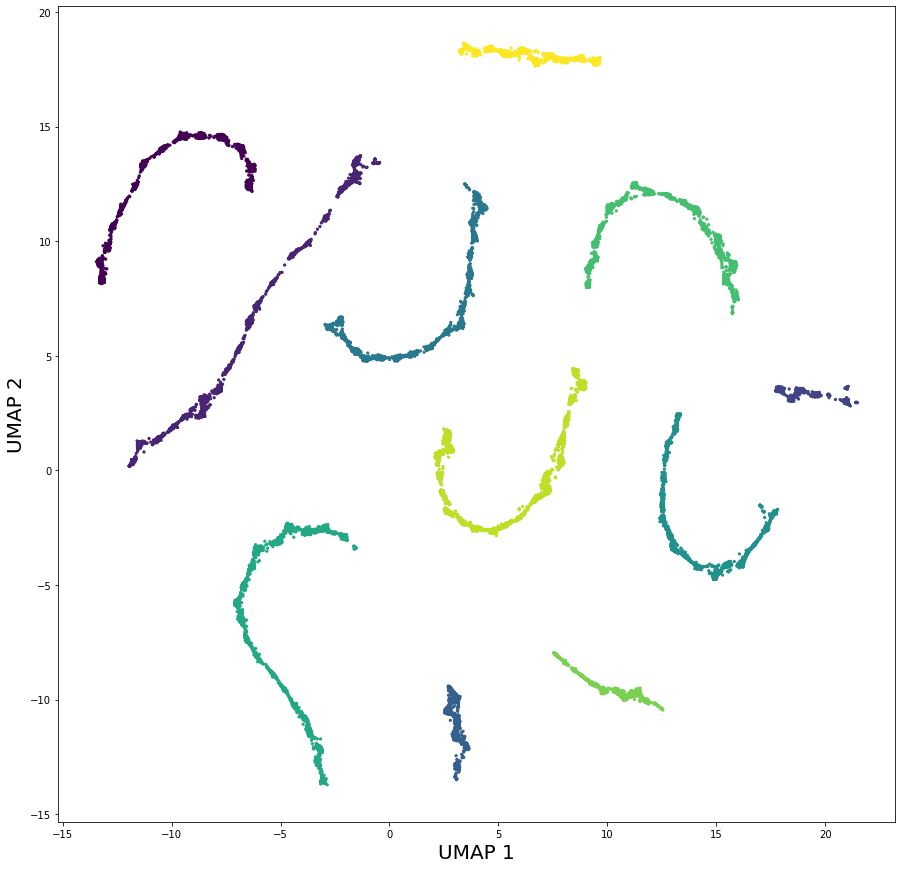

In [36]:
fig = plt.figure(figsize=(15,15))
plt.scatter(projected[:,0], projected[:,1], c=clustering, s=5)
_=plt.xlabel("UMAP 1", fontsize=20)
_=plt.ylabel("UMAP 2", fontsize=20)

In [27]:
n_clusters=len(set(clustering))

In [28]:
print(n_clusters)

11


In [29]:
cluster_models = {int(c):[] for c in set(clustering)}
for i,c in enumerate(clustering):
    cluster_models[int(c)].append(sample[i])

In [30]:
pickle.dump(cluster_models, open(f'{data_dir}/models/best_models/best_models_clusters_tmstp-{tmstp}.pickle','wb'))

In [31]:
for i,cm in cluster_models.items():
    print(i, len(cm))

0 5321
1 6566
2 1654
3 2057
4 5673
5 4805
6 6710
7 5493
8 2277
9 6413
10 3031
